In [7]:
import sys
from pathlib import Path
import typing as t
from langgraph.graph import StateGraph, START, END

sys.path.append(str(Path().cwd().parent))

from llm_experiments.chat import instantiate_chat

In [13]:
class State(t.TypedDict):
    query: str
    first_answer: str
    fact_checked_answer: str
    summarized_answer: str

In [14]:
model = instantiate_chat("4o-mini")

In [15]:
def generate_first_answer(state: State):
    msg = model.invoke(f"answer question: {state['query']}")
    return {"first_answer": msg.content}

def fact_check(state: State):
    msg = model.invoke(f"do a fact check: {state['first_answer']}")
    return {"fact_checked_answer": msg.content}

def summarize_answer(state: State):
    msg = model.invoke(f"summarize the answer: {state['fact_checked_answer']}")
    return {"summarized_answer": msg.content}

graph = StateGraph(State)
graph.add_node("generate_first_answer", generate_first_answer)
graph.add_node("fact_check", fact_check)
graph.add_node("summarize_answer", summarize_answer)

graph.add_edge(START, "generate_first_answer")
graph.add_edge("generate_first_answer", "fact_check")
graph.add_edge("fact_check", "summarize_answer")
graph.add_edge("summarize_answer", END)

chain = graph.compile()

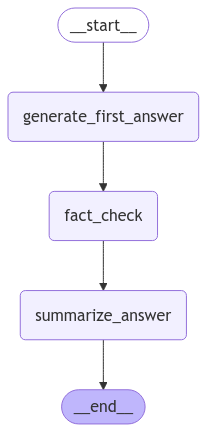

In [16]:
from IPython.display import display
from IPython.display import Image

display(Image(chain.get_graph().draw_mermaid_png()))

In [17]:
from pprint import pprint

pprint(chain.invoke({"query": "what is the weather in tokyo?"}))

{'fact_checked_answer': 'Your statement is accurate. As an AI, I do not have '
                        'real-time capabilities, including checking current '
                        'weather conditions. For the latest weather updates, '
                        'it’s best to consult reliable weather websites or '
                        'apps. Additionally, I can provide information about '
                        'typical weather patterns in Tokyo or any other '
                        'location. Let me know what specific information you '
                        'need!',
 'first_answer': "I don't have real-time capabilities to check the current "
                 'weather. However, you can easily find the weather in Tokyo '
                 'by checking a reliable weather website or using a weather '
                 "app. If you're looking for typical weather patterns, I can "
                 'provide that information as well. Let me know!',
 'query': 'what is the weather in tokyo?',